In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [5]:
#makes directories for data
from genericpath import isdir
os.chdir('/Users/BenjaminFamily/Desktop/456/Project456/archive/raw-img')
if os.path.isdir('train/dogs') is False:
    
    os.makedirs('train/dogs')
    os.makedirs('train/cats')
    os.makedirs('train/elephants')
    os.makedirs('train/squirrels')
    os.makedirs('train/horses')
    os.makedirs('train/butterflies')
    os.makedirs('train/chicken')
    os.makedirs('train/cows')
    os.makedirs('train/sheep')
    os.makedirs('train/spiders')
    os.makedirs('valid/dogs')
    os.makedirs('valid/cats')
    os.makedirs('valid/elephants')
    os.makedirs('valid/squirrels')
    os.makedirs('valid/horses')
    os.makedirs('valid/butterflies')
    os.makedirs('valid/chicken')
    os.makedirs('valid/cows')
    os.makedirs('valid/sheep')
    os.makedirs('valid/spiders')
    os.makedirs('test/dogs')
    os.makedirs('test/cats')
    os.makedirs('test/elephants')
    os.makedirs('test/squirrels')
    os.makedirs('test/horses')
    os.makedirs('test/butterflies')
    os.makedirs('test/chicken')
    os.makedirs('test/cows')
    os.makedirs('test/sheep')
    os.makedirs('test/spiders')

In [6]:
#fills train folders for images

for c in random.sample(glob.glob('cane/dog*'), 3404):
    shutil.move(c, 'train/dogs')

for c in random.sample(glob.glob('cavallo/horse*'), 1836):
    shutil.move(c, 'train/horses')

for c in random.sample(glob.glob('elefante/elephant*'), 1012):
    shutil.move(c, 'train/elephants')

for c in random.sample(glob.glob('farfalla/butterfly*'), 1478):
    shutil.move(c, 'train/butterflies')

for c in random.sample(glob.glob('gallina/chicken*'), 2168):
    shutil.move(c, 'train/chicken')

for c in random.sample(glob.glob('gatto/cat*'), 1167):
    shutil.move(c, 'train/cats')

for c in random.sample(glob.glob('mucca/cow*'),1306):
    shutil.move(c, 'train/cows')

for c in random.sample(glob.glob('pecora/sheep*'), 1274):
    shutil.move(c, 'train/sheep')
        
for c in random.sample(glob.glob('ragno/spider*'), 3374):
    shutil.move(c, 'train/spiders')

for c in random.sample(glob.glob('scoiattolo/squirrel*'),1303):
    shutil.move(c, 'train/squirrels')

In [7]:
#fills valid folders for images

for c in random.sample(glob.glob('cane/dog*'), 972):
    shutil.move(c, 'valid/dogs')

for c in random.sample(glob.glob('cavallo/horse*'), 524):
    shutil.move(c, 'valid/horses')

for c in random.sample(glob.glob('elefante/elephant*'), 289):
    shutil.move(c, 'valid/elephants')

for c in random.sample(glob.glob('farfalla/butterfly*'), 422):
    shutil.move(c, 'valid/butterflies')

for c in random.sample(glob.glob('gallina/chicken*'), 619):
    shutil.move(c, 'valid/chicken')

for c in random.sample(glob.glob('gatto/cat*'), 333):
    shutil.move(c, 'valid/cats')

for c in random.sample(glob.glob('mucca/cow*'), 373):
    shutil.move(c, 'valid/cows')

for c in random.sample(glob.glob('pecora/sheep*'), 364):
    shutil.move(c, 'valid/sheep')
        
for c in random.sample(glob.glob('ragno/spider*'), 964):
    shutil.move(c, 'valid/spiders')

for c in random.sample(glob.glob('scoiattolo/squirrel*'), 372):
    shutil.move(c, 'valid/squirrels')

In [8]:
#fills test folders for images

for c in random.sample(glob.glob('cane/dog*'), 487):
    shutil.move(c, 'test/dogs')

for c in random.sample(glob.glob('cavallo/horse*'), 263):
    shutil.move(c, 'test/horses')

for c in random.sample(glob.glob('elefante/elephant*'), 145):
    shutil.move(c, 'test/elephants')

for c in random.sample(glob.glob('farfalla/butterfly*'), 212):
    shutil.move(c, 'test/butterflies')

for c in random.sample(glob.glob('gallina/chicken*'), 311):
    shutil.move(c, 'test/chicken')

for c in random.sample(glob.glob('gatto/cat*'), 168):
    shutil.move(c, 'test/cats')

for c in random.sample(glob.glob('mucca/cow*'), 187):
    shutil.move(c, 'test/cows')

for c in random.sample(glob.glob('pecora/sheep*'), 182):
    shutil.move(c, 'test/sheep')
        
for c in random.sample(glob.glob('ragno/spider*'), 483):
    shutil.move(c, 'test/spiders')

for c in random.sample(glob.glob('scoiattolo/squirrel*'), 187):
    shutil.move(c, 'test/squirrels')
    


In [16]:
#initialize variables
os.chdir('../../')
train_path='/Users/BenjaminFamily/Desktop/456/Project456/archive/raw-img/train'
valid_path='/Users/BenjaminFamily/Desktop/456/Project456/archive/raw-img/valid'
test_path='/Users/BenjaminFamily/Desktop/456/Project456/archive/raw-img/test'

In [17]:
#preprocesses data like vgg16 did, removes a mean of pixels from each image

train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224, 224), 
classes=['dogs', 'cats', 'horses', 'elephants', 'squirrels', 'spiders', 'sheep', 'cows', 'chicken', 'butterflies'], batch_size=100)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224, 224), 
classes=['dogs', 'cats', 'horses', 'elephants', 'squirrels', 'spiders', 'sheep', 'cows', 'chicken', 'butterflies'], batch_size=100)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224, 224), 
classes=['dogs', 'cats', 'horses', 'elephants', 'squirrels', 'spiders', 'sheep', 'cows', 'chicken', 'butterflies'], batch_size=100, shuffle=False)


Found 18322 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Found 2625 images belonging to 10 classes.


In [18]:
#validates the above cell to make sure everything is right

assert train_batches.n==18322
assert valid_batches.n==5232
assert test_batches.n==2625
assert train_batches.num_classes==valid_batches.num_classes==test_batches.num_classes==10

In [19]:
imgs, labels=next(train_batches)

In [82]:
def plotImages(images_arr):
    
    #just outputs the small pictures below
    fig, axes=plt.subplots(1, 10, figsize=(20,20))
    
    #takes an array greater than 1 dimension, and puts it into a 1D array.  Ex:  [[1,2],[3,4]] -> [1,2,3,4]
    axes=axes.flatten()
    
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

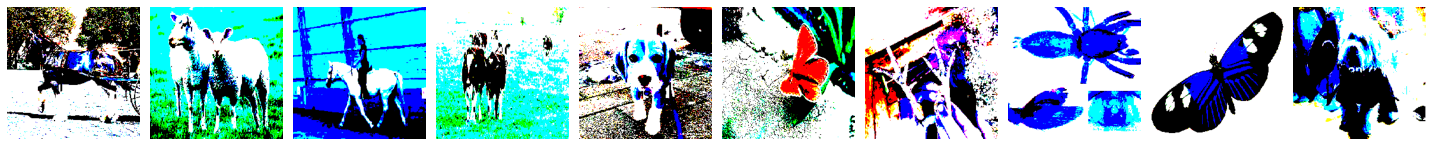

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [83]:
plotImages(imgs)
print(labels)

In [57]:
model=Sequential([
    
    #kernel size is the size of the filter
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2), 
    BatchNormalization(),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2), 
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2), 
    BatchNormalization(),
    
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    BatchNormalization(),
    
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    BatchNormalization(),
    
    Flatten(), 
    
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax'),])

In [58]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_67 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_94 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                     

In [59]:
#must use categorical_crossentropy since the classes are greater than 2
#first tried a learning rate of 0.01, this yielded in very low accuracy in both training and validation
#decreasing the learning rate to 0.0005 increased both accuracies greatly, but then the validation loss increased by a lot
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
#batch size default 32
#this model has some overfitting problems.  The validation loss is waaay too high.  
#Even though the training accuracy and validation accuracy are the same, the validation loss indicates that overfitting is a problem

#through some research, high validation accuracy and high validation loss means the model is predicting correctly, 
#but its becoming less certain of its predictions, which will lead to overfitting
history=model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
184/184 - 1663s - loss: 2.1390 - accuracy: 0.3309 - val_loss: 1.7182 - val_accuracy: 0.4262 - 1663s/epoch - 9s/step
Epoch 2/20
184/184 - 1659s - loss: 1.7150 - accuracy: 0.4352 - val_loss: 1.4961 - val_accuracy: 0.5063 - 1659s/epoch - 9s/step
Epoch 3/20
184/184 - 1643s - loss: 1.5020 - accuracy: 0.5022 - val_loss: 1.2505 - val_accuracy: 0.5906 - 1643s/epoch - 9s/step
Epoch 4/20
184/184 - 1661s - loss: 1.3129 - accuracy: 0.5637 - val_loss: 1.1796 - val_accuracy: 0.6189 - 1661s/epoch - 9s/step
Epoch 5/20
184/184 - 1647s - loss: 1.1889 - accuracy: 0.6024 - val_loss: 1.1042 - val_accuracy: 0.6464 - 1647s/epoch - 9s/step
Epoch 6/20
184/184 - 1656s - loss: 1.0793 - accuracy: 0.6413 - val_loss: 1.0146 - val_accuracy: 0.6720 - 1656s/epoch - 9s/step
Epoch 7/20
184/184 - 1642s - loss: 0.9745 - accuracy: 0.6802 - val_loss: 0.9693 - val_accuracy: 0.6869 - 1642s/epoch - 9s/step
Epoch 8/20
184/184 - 1655s - loss: 0.8696 - accuracy: 0.7106 - val_loss: 0.9044 - val_accuracy: 0.7051 - 1655s/

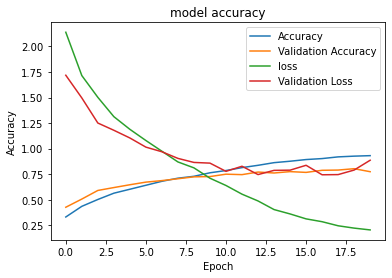

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

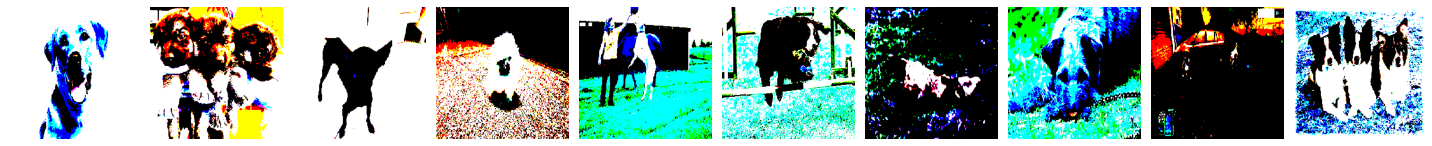

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

In [63]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [64]:
test_batches.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [66]:
predictions=model.predict(x=test_batches, verbose=0)

In [67]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [68]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [79]:
def plot_cm(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh=cm.max() /2
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        
    

In [80]:
test_batches.class_indices

{'dogs': 0,
 'cats': 1,
 'horses': 2,
 'elephants': 3,
 'squirrels': 4,
 'spiders': 5,
 'sheep': 6,
 'cows': 7,
 'chicken': 8,
 'butterflies': 9}

Confusion matrix, without normalization
[[410  14  24   2   4   7   6  16   3   1]
 [ 57  90   1   2   3   5   2   1   3   4]
 [ 36   0 188   1   1   1   5  26   1   4]
 [  9   2  14 110   0   1   0   9   0   0]
 [ 38  23   5   3  88   9   8   2   8   3]
 [ 16   5   3   3   4 434   5   5   2   6]
 [ 29   5   5   4   5   1  95  35   3   0]
 [ 30   0  11   2   1   1  11 128   3   0]
 [ 27   1   5   3   4   9   2   9 241  10]
 [  3   0   3   1   2  34   0   2   4 163]]


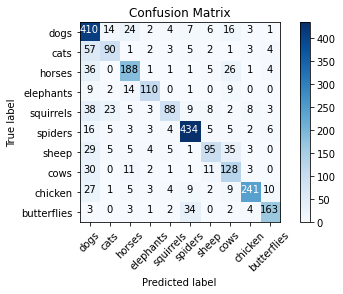

In [81]:
cm_plot_labels=['dogs', 'cats', 'horses', 'elephants', 'squirrels', 'spiders', 'sheep', 'cows', 'chicken', 'butterflies']
plot_cm(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [75]:
print(predictions)

[[9.9999988e-01 1.1629713e-07 3.5734258e-12 ... 8.5325471e-12
  2.2938391e-11 2.6777721e-15]
 [9.9999452e-01 2.6211287e-06 1.6146503e-08 ... 2.8908323e-06
  1.2606362e-09 3.2122926e-11]
 [5.6104386e-01 3.4134646e-03 3.0157459e-01 ... 3.5818480e-02
  3.7441906e-02 1.0485387e-03]
 ...
 [5.1904819e-04 4.5140005e-05 1.1370919e-03 ... 1.2075628e-05
  4.6483113e-04 9.5214623e-01]
 [2.4313469e-14 3.8970350e-19 4.8213034e-14 ... 3.4932727e-23
  4.1235713e-11 1.0000000e+00]
 [4.2993552e-03 1.6092761e-01 6.5234053e-04 ... 2.3905872e-04
  6.2073827e-01 1.4481442e-01]]
